# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:
https://github.com/oksanaprotsukha/eds220-hwk-1.git

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [5]:
# Import pandas
import pandas as pd

# read in file
raw_eqk = pd.read_csv('data/earthquake_data.csv')

# view the first 5 records
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [8]:
# Print the shape of the raw_eqk dataframe
print(raw_eqk.shape)

# Print the type of raw_eqk's shape
print(type(raw_eqk.shape))

# Print only the number of rows by accessing it from raw_eqk's shape
print(raw_eqk.shape[0])

(120108, 8)
<class 'tuple'>
120108


## 3

Get the unique values of the type of events.

In [9]:
# Get the unique values of the type of events
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [14]:
# Select only earthquake events and store them as eqk (variable name)
eqk = raw_eqk[raw_eqk.type == 'earthquake']

# Update the index of eqk to be the id column of the dataframe
eqk.set_index('id', inplace=True)

# Check the new index by viewing the first 3 rows of eqk
eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [21]:
# Calculate how many events were left out of raw_eqk 
# when only earthqake events are selected

count_non_earthquake_events = (raw_eqk.shape[0] - eqk.shape[0])
count_non_earthquake_events

1710

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Earthquake magnitudes'}, ylabel='Frequency'>

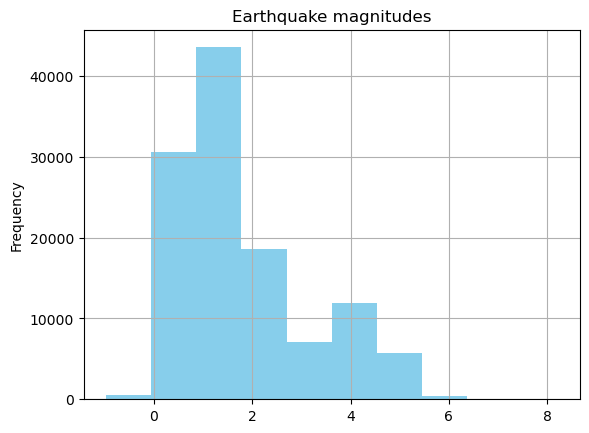

In [22]:
# plot a histogram of the eartquake's magnitudes using eqk data
eqk.mag.plot(kind="hist",
             title="Earthquake magnitudes",
             label="Magnitude of event",
             color = "skyblue",
             grid=True)

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

In [25]:
# Create a new variable top20 with the 20 earthquakes with largest magnitude
top20 = eqk.mag.nlargest(20).sort_values(ascending=False)
top20 = eqk.loc[top20.index]

top20

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,"33km ESE of Petatlan, Mexico",earthquake
usc000sxh8,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,"154km NW of Kota Ternate, Indonesia",earthquake


*Write your answer for 7c here*

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [32]:
# solve exercise here
eqk.loc[:,['place','mag','depth']].loc[top20.index]

,place,mag,depth
id,,,
usc000nzvd,"94km NW of Iquique, Chile",8.2,25.00
usc000rki5,"19km SE of Little Sitkin Island, Alaska",7.9,109.00
usc000p27i,"53km SW of Iquique, Chile",7.7,22.40
usc000phx5,"93km SSE of Kirakira, Solomon Islands",7.6,22.56
usb000pr89,"70km SW of Panguna, Papua New Guinea",7.5,43.37
usc000piqj,"112km S of Kirakira, Solomon Islands",7.4,39.00
usb000slwn,"74km S of Intipuca, El Salvador",7.3,40.00
usb000pq41,"33km ESE of Petatlan, Mexico",7.2,24.00
usc000sxh8,"154km NW of Kota Ternate, Indonesia",7.1,45.00


# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<AxesSubplot:title={'center':'The locations of eartquakes with magnitude greater than 5'}, xlabel='longitude', ylabel='latitude'>

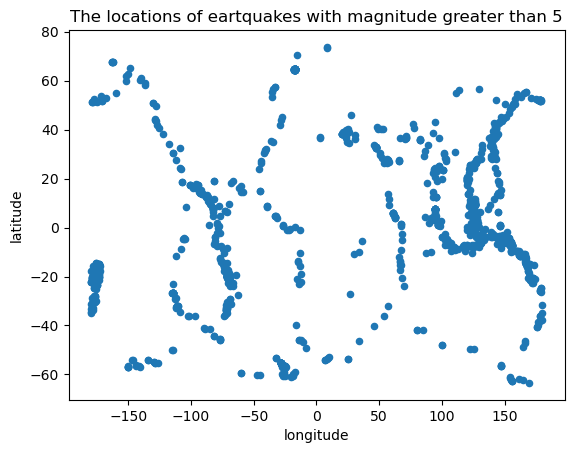

In [37]:
# Create scatterplot of the locations of eartquakes with magnitude greater than 5

eqk[eqk.mag >5].plot(kind = 'scatter',
             x= 'longitude',
             y='latitude',
             title = 'The locations of eartquakes with magnitude greater than 5'
             )